In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("SampleSuperstore.csv")
data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
data=data.drop("Postal Code",axis=1)

In [5]:
data["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [6]:
data["Segment"].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [7]:
sales_profit = data.groupby('State')['Profit'].sum()

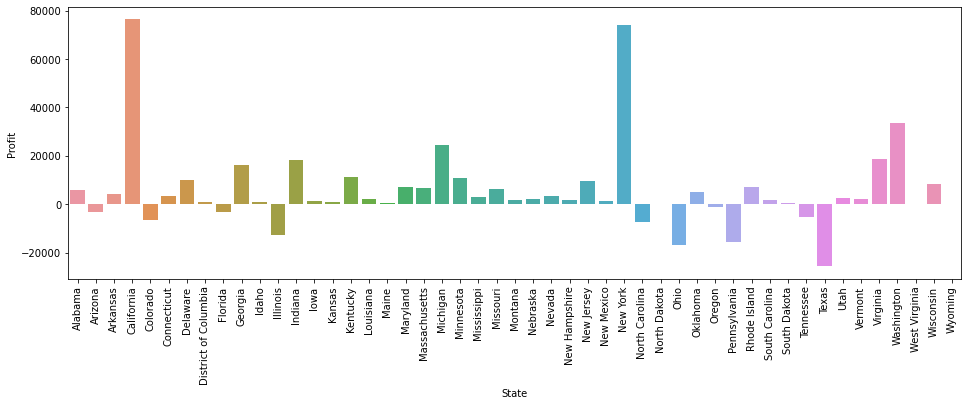

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,5))
sns.barplot(x=sales_profit.index, y=sales_profit.values)
plt.xticks(rotation=90)
plt.ylabel('Profit')
plt.show()

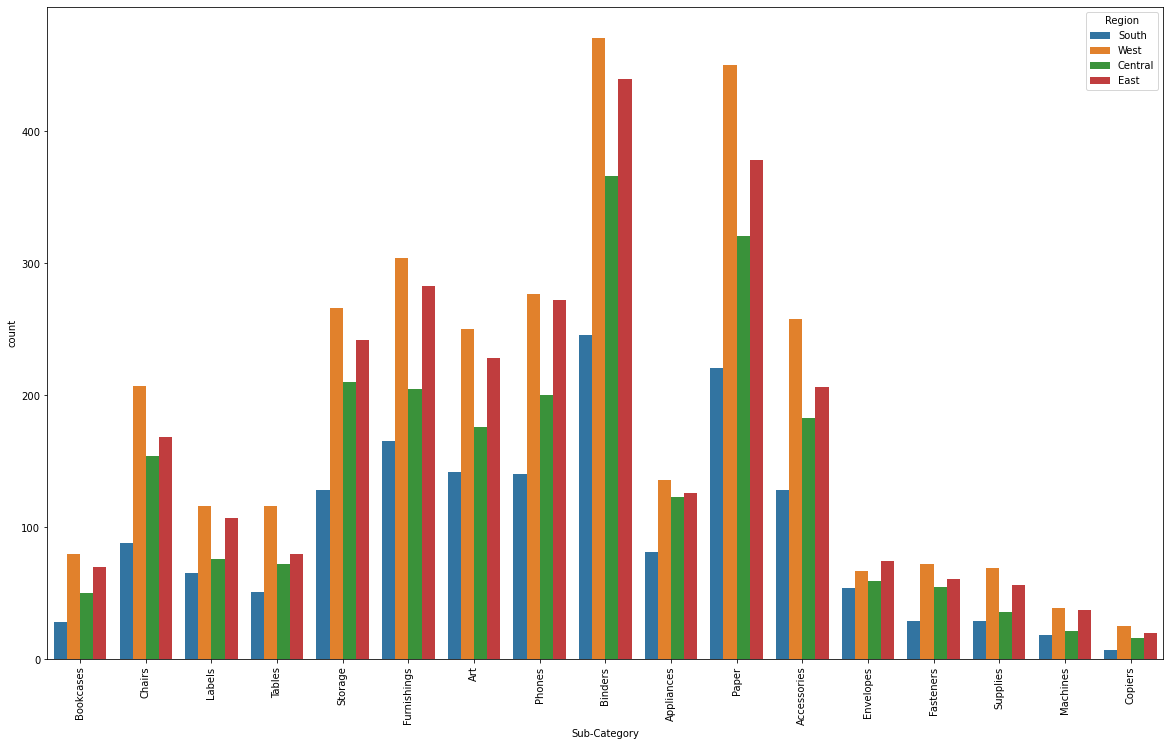

In [9]:

# To see the Region wise different sub-categories order
plt.figure(figsize=(20,12))
sns.countplot(x="Sub-Category", hue="Region",data=data)
plt.xticks(rotation="vertical")
plt.show()

<ipython-input-10-2a476cadf4e4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  category = data.groupby(['Sub-Category'])['Profit','Sales'].sum()


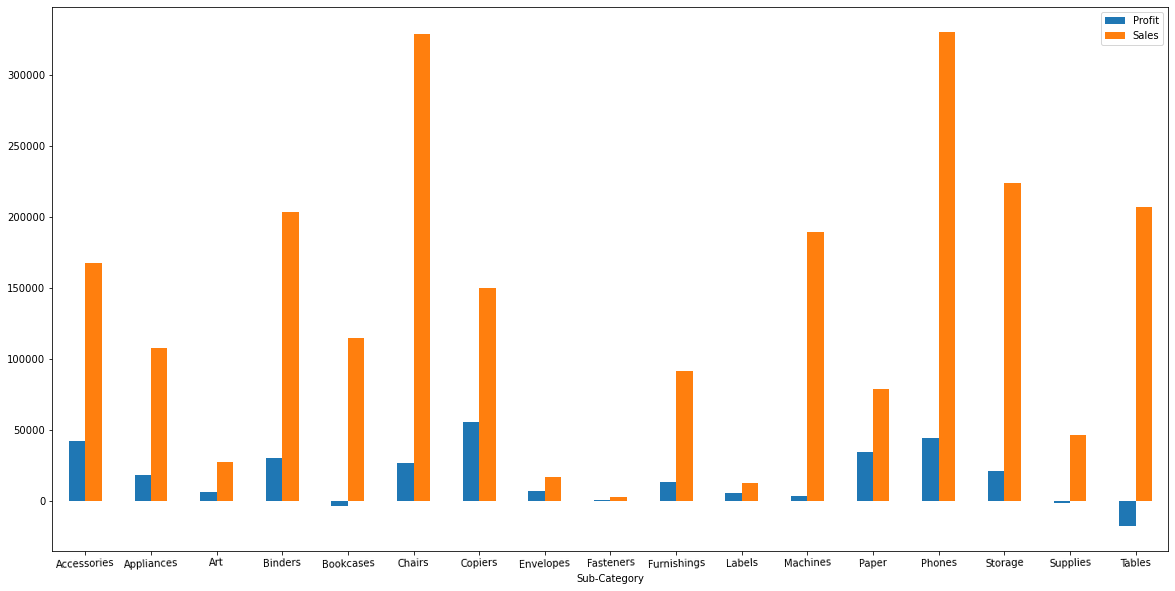

In [10]:
category = data.groupby(['Sub-Category'])['Profit','Sales'].sum()
category.plot.bar(rot=2,figsize=(20,10))

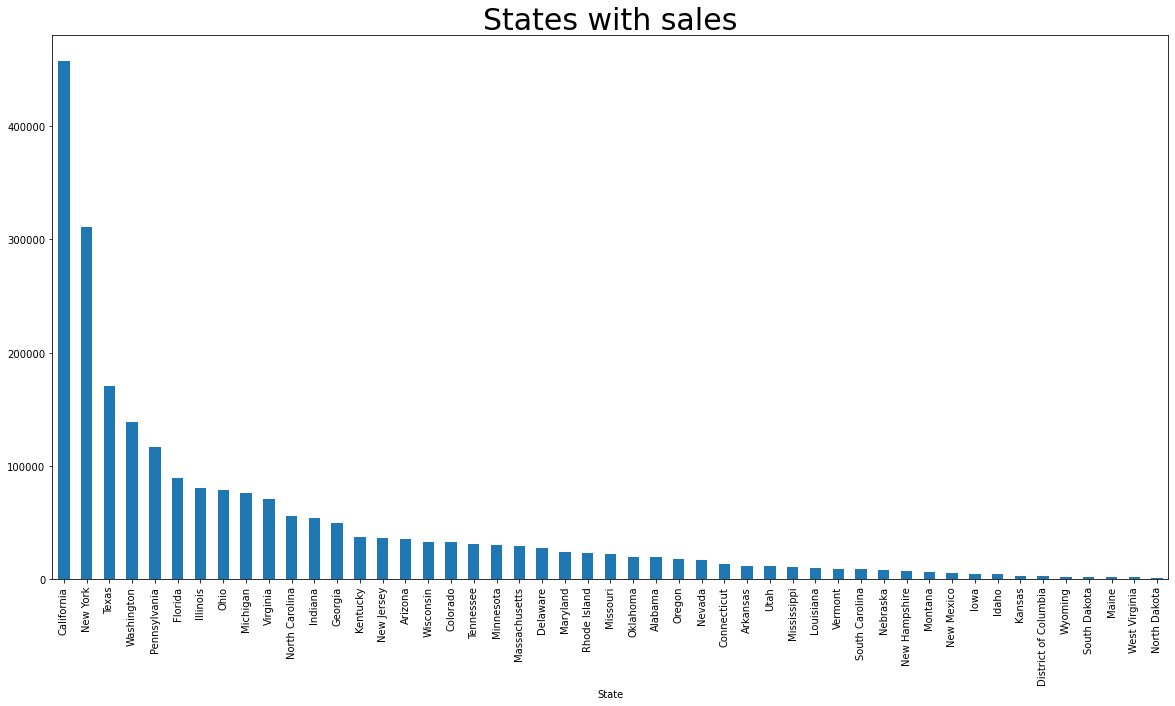

In [11]:

states = data.groupby('State')['Sales'].sum()
states.sort_values(ascending=False, inplace=True)
fig, ax=plt.subplots(figsize=(20,10))
plt.title("States with sales", size=30)
states.plot.bar()

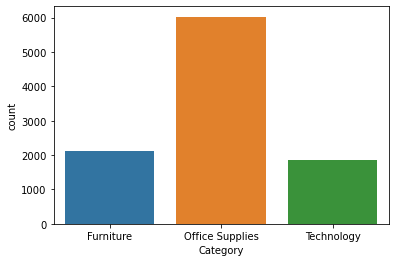

In [12]:
sns.countplot("Category",data=data)

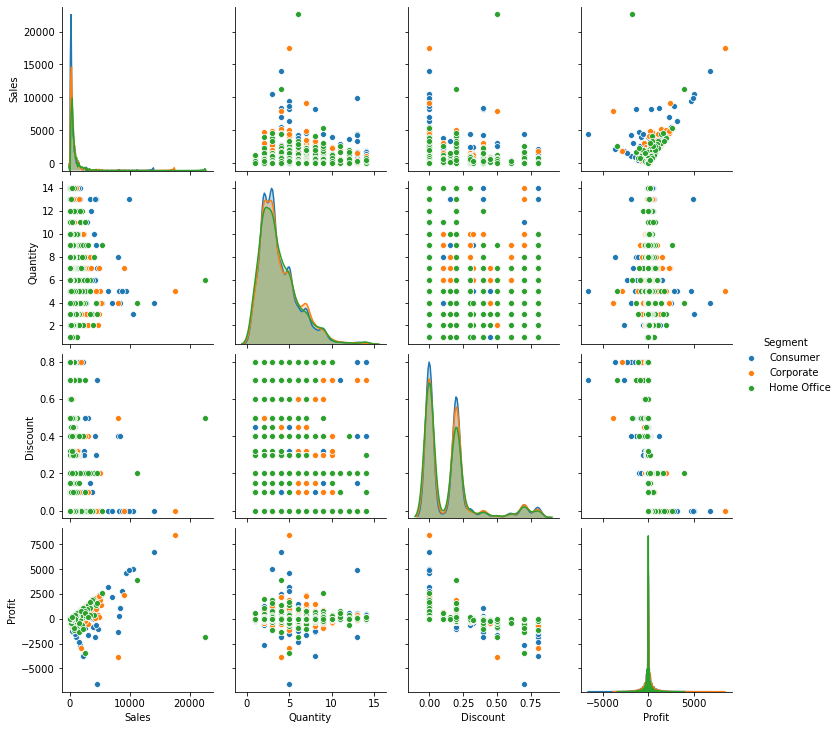

In [13]:
sns.pairplot(data,hue='Segment')